Mode 10, Iteration 600
0 minima > 0; 5 maxima < 0.
(12, 5174)


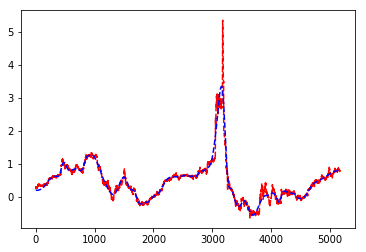

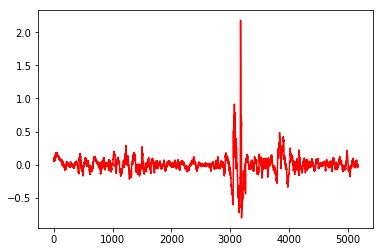

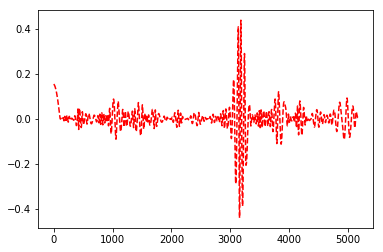

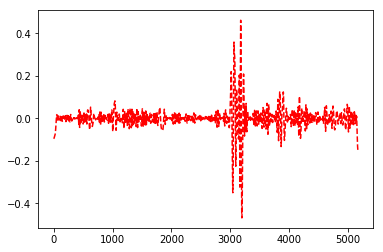

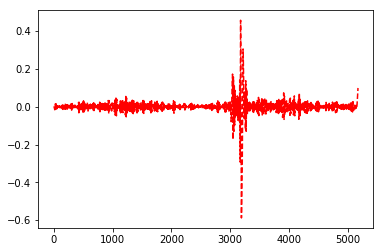

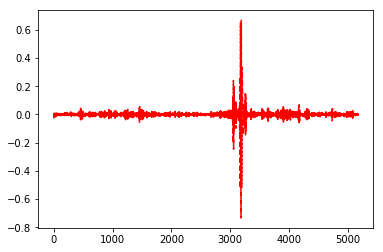

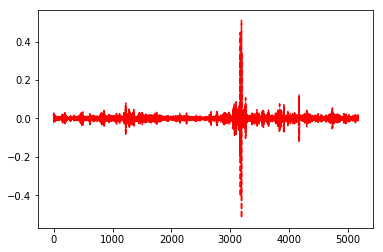

2
3
4
5
6
7
8
9
10
11
12


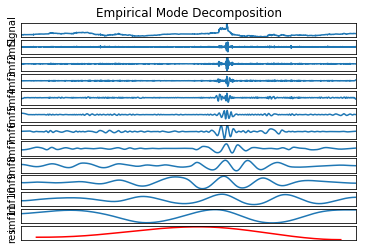

Training set score:-0.8676972601758999
ridge.coef_: [ 2.28904860e-01  3.99779513e-03 -2.96831460e-01  1.79835298e-01
  5.29874933e-05 -1.43508618e-01 -1.11984215e-01 -1.50704887e-01
 -1.34359015e-02  2.99885468e-01]
ridge.intercept_: 0.055470326996008866


In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from pyhht.emd import EMD
from pyhht.visualization import plot_imfs
data = pd.read_csv('signal_train.csv',header=0)

#data 0
decomposer = EMD(data['predict'])               
imfs = decomposer.decompose()
print(imfs.shape)
new_ts = imfs[-6]+imfs[-5]+imfs[-4]+imfs[-3]+imfs[-2]+imfs[-1]
t = np.arange(0, 5174, 1)

# red dashes, blue squares and green triangles
plt.plot(t, data['predict'], 'r--', t, new_ts, 'b--')
plt.show()
plt.plot(t, data['predict']-new_ts, 'r-')
plt.show()

plt.plot(t, imfs[4], 'r--')
plt.show()
plt.plot(t, imfs[3], 'r--')
plt.show()
plt.plot(t, imfs[2], 'r--')
plt.show()
plt.plot(t, imfs[1], 'r--')
plt.show()
plt.plot(t, imfs[0], 'r--')
plt.show()

plot_imfs(data['predict'],imfs,data.index)
arr = np.vstack((imfs,data['predict']))
dataframe = pd.DataFrame(arr.T)
dataframe.to_csv('imf.csv',index=None,columns=None)

data = pd.read_csv('signal_train.csv',header=0)

#one, two, three steps
#one-step
import math
lag1 = pd.read_csv('imf.csv',header = 0)
y = lag1['10']

x1 = lag1.iloc[:,0:10]
point = math.floor(len(y)*0.8)
x1_train = x1[:point]
x1_test = x1[point:]
y_train = y[:point]
y_test = y[point:]

from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(x1_train, y_train)
print("Training set score:{}".format(reg.score(x1_test,y_test)))
print("ridge.coef_: {}".format(reg.coef_))
print("ridge.intercept_: {}".format(reg.intercept_))


In [10]:
high_freq = pd.DataFrame(data['predict']-new_ts)
high_freq.to_csv('high_freq_terms.csv')